<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Analizando el Delito en Chicago

En este caso-taller vamos a utilizar datos geográficos y estimación de densidad de kernel para analizar delitos en Chicago. Esta ciudad es muy famosa no sólo por haber sido el hogar del mafioso Al Capone, sino también por sus altas tasas de delitos. 

Para este taller obtuve datos del portal de la [ciudad de Chicago](https://www.chicago.gov/city/en/dataset/crime.html). La base de datos fue traducida y modificada para nuestras necesidades. Esta contiene todos los homicidios y robos que sucedieron entre el 1 de junio y el 31 de agosto de 2019.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

#### 1.1. Delitos

En la carpeta `data` se encuentra el archivo `Chicago_delitos_verano_2019.csv` cargue estos datos en su *cuaderno*. Describa brevemente el contenido de la base.

In [3]:
import pandas as pd

df=pd.read_csv('./data/Chicago_delitos_verano_2019.csv')

In [4]:
df.head()

,fecha,tipo_crimen,nro_area_comunitaria,lat,lon
0,2019-06-01T05:07:00Z,homicidio,23,41.897950,-87.728625
1,2019-06-01T10:09:00Z,homicidio,71,41.753272,-87.648963
2,2019-06-01T12:46:00Z,homicidio,25,41.877622,-87.750728
3,2019-06-01T11:35:00Z,homicidio,16,41.960145,-87.699654
4,2019-06-02T09:39:00Z,homicidio,37,41.804773,-87.633256


In [5]:
df.shape

(17747, 5)

In [6]:
tabla_frecuencias = df['tipo_crimen'].value_counts().reset_index()
tabla_frecuencias.columns = ['Tipo de Crimen', 'Frecuencia']
tabla_frecuencias = tabla_frecuencias.sort_values(by='Frecuencia', ascending = False)
total_frecuencias = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Porcentaje'] = round((tabla_frecuencias['Frecuencia'] / total_frecuencias) * 100, 2)


print(tabla_frecuencias)

  Tipo de Crimen  Frecuencia  Porcentaje
0           robo       17603       99.19
1      homicidio         144        0.81


In [7]:
tabla_frecuencias = df['nro_area_comunitaria'].value_counts().reset_index()
tabla_frecuencias.columns = ['Área comunitaria', 'Frecuencia']
tabla_frecuencias = tabla_frecuencias.sort_values(by='Frecuencia')
total_frecuencias = tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Porcentaje'] = round((tabla_frecuencias['Frecuencia'] / total_frecuencias) * 100, 2)
print(tabla_frecuencias)

    Área comunitaria  Frecuencia  Porcentaje
76                47          12        0.07
75                 9          19        0.11
74                74          21        0.12
73                12          23        0.13
72                55          28        0.16
..               ...         ...         ...
4                  6         763        4.30
3                 24         799        4.50
2                 28         914        5.15
1                  8        1559        8.78
0                 32        1589        8.95

[77 rows x 3 columns]


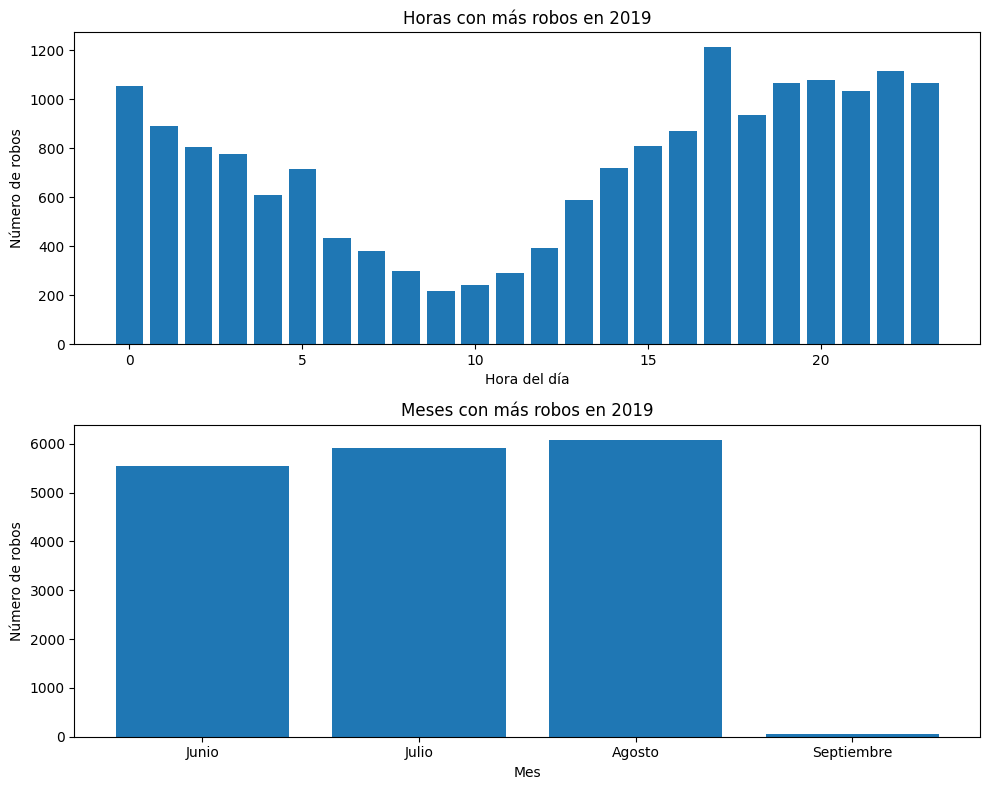

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df_robos = df[df['tipo_crimen'] == 'robo'].copy()
df_robos['fecha'] = pd.to_datetime(df['fecha'])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de barras para las horas
df_robos['hora'] = df_robos['fecha'].dt.hour
horas_mas_robos = df_robos['hora'].value_counts().sort_index()
ax1.bar(horas_mas_robos.index, horas_mas_robos.values)
ax1.set_title('Horas con más robos en 2019')
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Número de robos')

# Gráfico de barras para los meses
df_robos['mes'] = df_robos['fecha'].dt.month
meses_mas_robos = df_robos['mes'].value_counts().sort_index()
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ax2.bar([nombres_meses[i - 1] for i in meses_mas_robos.index], meses_mas_robos.values)
ax2.set_title('Meses con más robos en 2019')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Número de robos')

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

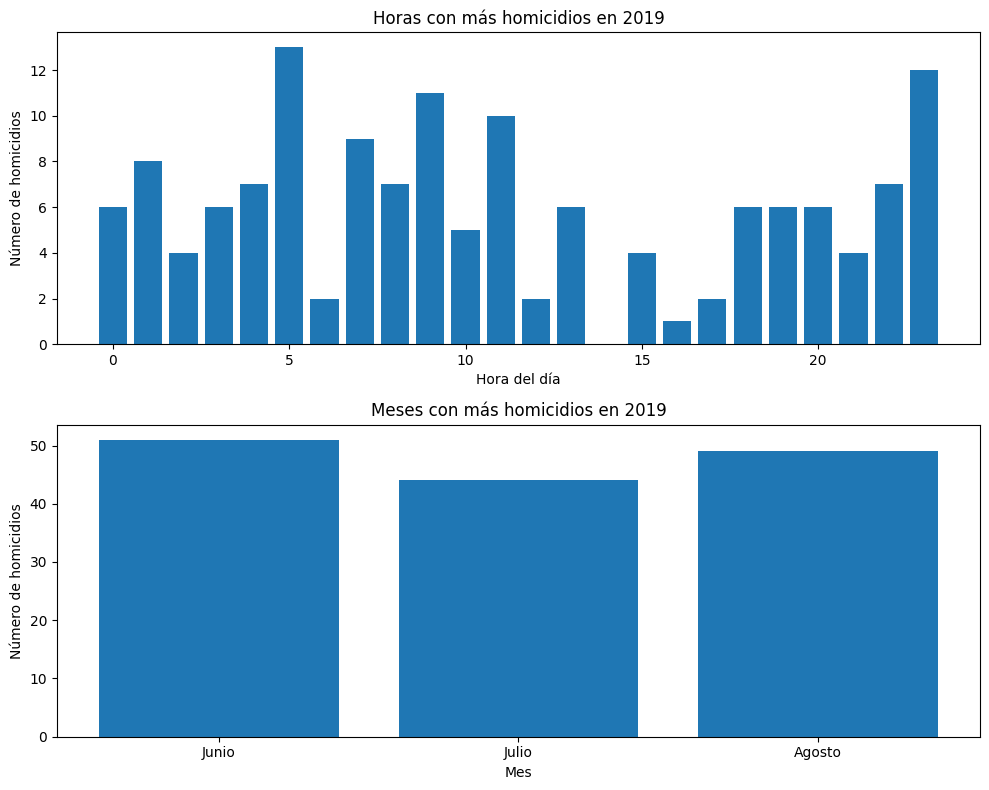

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df_homicidios = df[df['tipo_crimen'] == 'homicidio'].copy()
df_homicidios['fecha'] = pd.to_datetime(df['fecha'])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de barras para las horas
df_homicidios['hora'] = df_homicidios['fecha'].dt.hour
horas_mas_robos = df_homicidios['hora'].value_counts().sort_index()
ax1.bar(horas_mas_robos.index, horas_mas_robos.values)
ax1.set_title('Horas con más homicidios en 2019')
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Número de homicidios')

# Gráfico de barras para los meses
df_homicidios['mes'] = df_homicidios['fecha'].dt.month
meses_mas_robos = df_homicidios['mes'].value_counts().sort_index()
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ax2.bar([nombres_meses[i - 1] for i in meses_mas_robos.index], meses_mas_robos.values)
ax2.set_title('Meses con más homicidios en 2019')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Número de homicidios')

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

(Utilice este espacio para describir su procedimiento)

#### 1.2. Barrios de Chicago

También en la carpeta `data` se encuentran los archivos con los polígonos de las áreas comunitarias en un archivo comprimido llamado `Areas_comunitarias_Chicago.zip`. Genere un mapa interactivo con un popup con el nombre del area comunitaria.

In [12]:
# Utilice este espacio para escribir el código.
import geopandas as gpd
areas = gpd.read_file("./data/Areas_comunitarias_Chicago.zip")
areas.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


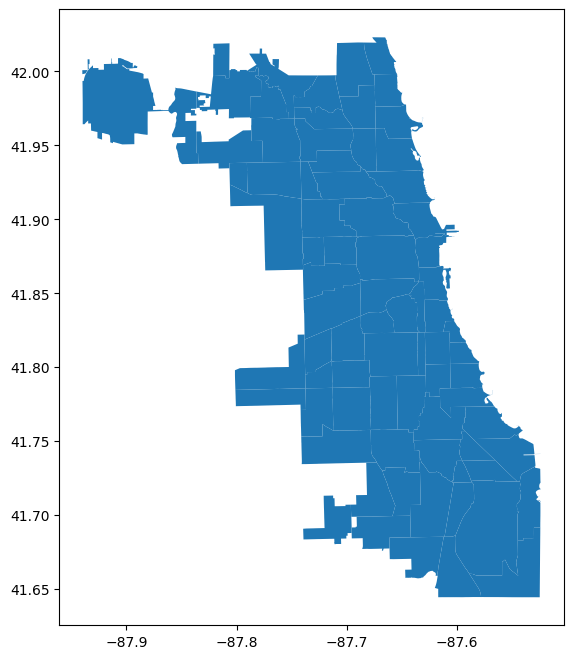

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
areas.plot(ax = ax);

In [15]:
import folium

map = folium.Map(location = [41.8781, -87.6298], tiles = "OpenStreetMap", zoom_start = 10)

for _, r in areas.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': '#FFFFFF'})
    folium.Popup(r['community']).add_to(geo_j)
    geo_j.add_to(map)
map

(Utilice este espacio para describir su procedimiento).

### 2.   Análisis distribución del crimen por barrios

#### 2.1.  Genere una tabla descriptiva donde se muestra el número total de delitos, el número total de robos y el número total de homicidios, y como porcentaje de total por barrios. La tabla debe contener ademas una fila final donde se muestre el total para la ciudad. Describa los resultados que obtiene.


In [16]:

import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'fecha', 'tipo_crimen' y 'nro_area_comunitaria'

# 1. Calcular el número total de delitos por barrio
total_delitos_por_barrio = df.groupby('nro_area_comunitaria')['tipo_crimen'].count().reset_index()
total_delitos_por_barrio.columns = ['nro_area_comunitaria', 'Total Delitos']

# 2. Calcular el número total de robos por barrio
total_robos_por_barrio = df[df['tipo_crimen'] == 'robo'].groupby('nro_area_comunitaria')['tipo_crimen'].count().reset_index()
total_robos_por_barrio.columns = ['nro_area_comunitaria', 'Total Robos']

# 3. Calcular el número total de homicidios por barrio
total_homicidios_por_barrio = df[df['tipo_crimen'] == 'homicidio'].groupby('nro_area_comunitaria')['tipo_crimen'].count().reset_index()
total_homicidios_por_barrio.columns = ['nro_area_comunitaria', 'Total Homicidios']

# 4. Combinar las tablas por barrio
tabla_por_barrios = total_delitos_por_barrio.merge(total_robos_por_barrio, on='nro_area_comunitaria', how='outer')
tabla_por_barrios = tabla_por_barrios.merge(total_homicidios_por_barrio, on='nro_area_comunitaria', how='outer')

# 5. Calcular los porcentajes por barrio
tabla_por_barrios['Porcentaje Delitos'] = (tabla_por_barrios['Total Delitos'] / tabla_por_barrios['Total Delitos'].sum()) * 100
tabla_por_barrios['Porcentaje Robos'] = (tabla_por_barrios['Total Robos'] / tabla_por_barrios['Total Delitos'].sum()) * 100
tabla_por_barrios['Porcentaje Homicidios'] = (tabla_por_barrios['Total Homicidios'] / tabla_por_barrios['Total Delitos'].sum()) * 100

# 6. Calcular el total para la ciudad
total_ciudad = tabla_por_barrios[['Total Delitos', 'Total Robos', 'Total Homicidios']].sum().to_frame().T
total_ciudad.index = ['Total Ciudad']
total_ciudad['Porcentaje Delitos'] = 100.0  # El 100% representa el total de delitos para la ciudad

# 7. Concatenar la fila de total de la ciudad a la tabla por barrios
tabla_final = pd.concat([tabla_por_barrios, total_ciudad])
tabla_final = tabla_final.fillna(0)


In [17]:
tabla_final

,nro_area_comunitaria,Total Delitos,Total Robos,Total Homicidios,Porcentaje Delitos,Porcentaje Robos,Porcentaje Homicidios
0,1.0,377.0,375.0,2.0,2.124303,2.113033,0.01127
1,2.0,280.0,280.0,0.0,1.577731,1.577731,0.00000
2,3.0,266.0,266.0,0.0,1.498845,1.498845,0.00000
3,4.0,169.0,169.0,0.0,0.952274,0.952274,0.00000
4,5.0,99.0,99.0,0.0,0.557841,0.557841,0.00000
...,...,...,...,...,...,...,...
73,74.0,21.0,21.0,0.0,0.118330,0.118330,0.00000
74,75.0,124.0,124.0,0.0,0.698710,0.698710,0.00000
75,76.0,163.0,163.0,0.0,0.918465,0.918465,0.00000
76,77.0,228.0,228.0,0.0,1.284724,1.284724,0.00000


(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

#### 2.2. Genere una gráfica de dispersión entre el total de homicidios y robos por barrios. Incluya en la gráfica la recta de regresión que mejor ajusta a esos datos. Describa los resultados que obtiene.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

homicidios = tabla_final['Total Homicidios']
robos = tabla_final['Total Robos']
slope, intercept, r_value, p_value, std_err = stats.linregress(robos, homicidios)
line = slope * robos + intercept

In [19]:
slope

0.008052256027819131

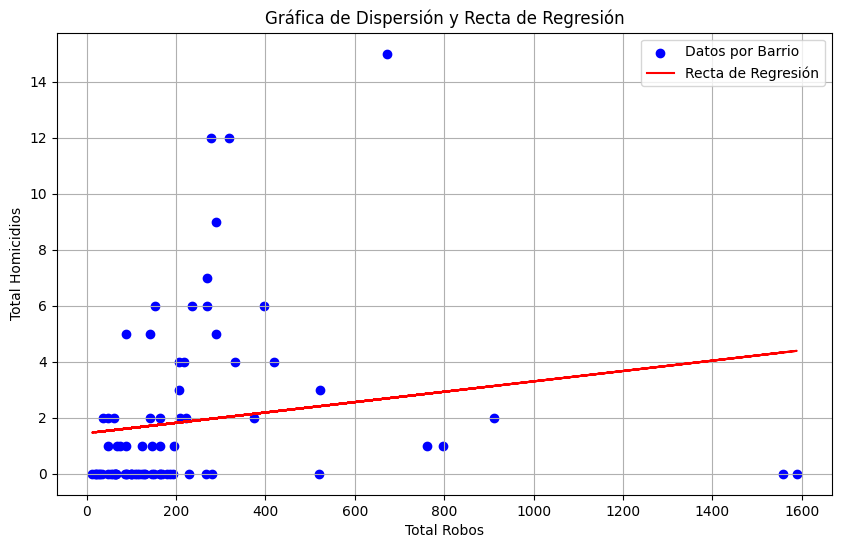

Pendiente (slope): 0.0018510856896903404
Intercepto: 1.4469524494075445
Coeficiente de correlación (r-value): 0.1711232662361799
Valor p: 0.13674038201445335
Error estándar: 0.0012306459019663487


In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

homicidios = tabla_final['Total Homicidios'][:-1]
robos = tabla_final['Total Robos'][:-1]

plt.figure(figsize=(10, 6))
plt.scatter(robos, homicidios, label='Datos por Barrio', color='blue')

slope, intercept, r_value, p_value, std_err = stats.linregress(robos, homicidios)
line = slope * robos + intercept
plt.plot(robos, line, color='red', label='Recta de Regresión')


plt.xlabel('Total Robos')
plt.ylabel('Total Homicidios')
plt.title('Gráfica de Dispersión y Recta de Regresión')
plt.legend()


plt.grid()
plt.show()


print(f"Pendiente (slope): {slope}")
print(f"Intercepto: {intercept}")
print(f"Coeficiente de correlación (r-value): {r_value}")
print(f"Valor p: {p_value}")
print(f"Error estándar: {std_err}")


(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 3. Distribución espacial del delito

#### 3.1 Distribución respecto al centro de la ciudad

Tomando como centro de la ciudad las coordenadas (-87.627800, 41.881998), estime funciones de densidad que muestren gráficamente el gradiente del total de robos, y homicidios, como función de la distancia al centro de la ciudad. Explique cómo midió las distancias incluyendo que medida de distancia utilizó. Para elegir el ancho de banda y la función de kernel más apropiados utilice validación cruzada usando todas las opciones posibles de kernel. Describa los resultados que obtiene.

In [21]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 3.2 Puntos calientes en la ciudad

Usando `statsmodels` implemente la estimación de densidad bivariada para el total de robos y el total de homicidios. Muestre los resultados usando curvas de nivel en una visualización interactiva. Compare los resultados de estimar usando los anchos de banda: `normal_reference` y `cv_ml`. Explique en que consisten ambas formas de estimar el ancho de banda. Comente sobre los puntos calientes encontrados bajo ambos métodos y su ubicación en la ciudad. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [22]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

## 4. Explicando la ubicación del delito

El objetivo de este punto es encontrar posibles correlaciones  entre el crimen y características de la ciudad. Para ello, utilice los datos de OpenStreetMap y explore si existe una correlación entre el porcentaje del área de la comunidad  dedicado a tiendas (`retail`)  y comercios (`commercial`) y el número total de robos y homicidios en esa comunidad. Ofrezca una explicación intuitiva de por qué cree que aparecen estas correlaciones. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [23]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)